**SLANT CHESSBOX**

# **Install & Import Libraries**

In [1]:
# Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files
import os


# **Upload Image**

Saving images.jpg to images (1).jpg


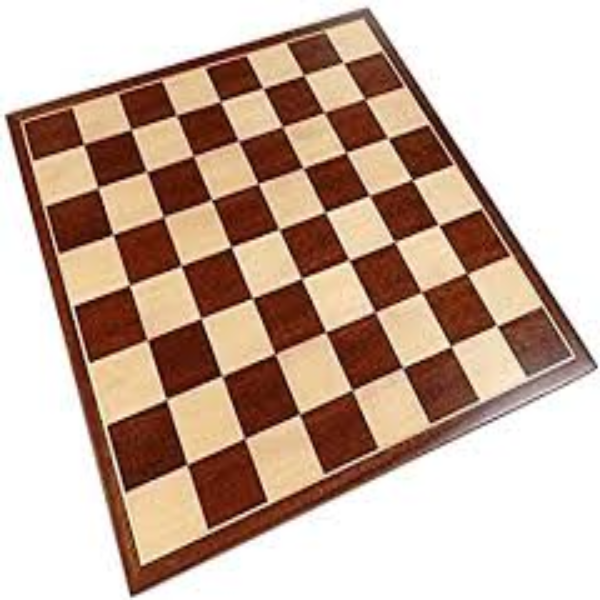

In [7]:
from google.colab import files
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Upload image using Colab's file upload widget
uploaded = files.upload()

# Grab the uploaded filename
image_path = next(iter(uploaded))

# Load and show image
img = cv2.imread(image_path)
if img is not None:
    img_resized = cv2.resize(img, (600, 600))  # Resize for better display
    cv2_imshow(img_resized)
else:
    print("❌ Image could not be loaded.")


# **Load and Preprocess Image**

In [3]:
# Read the image
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    print(" Image not loaded. Please upload a valid image")


# **Detect Chessboard and Apply Perspective Transform**

In [4]:
if img is not None:
    # Resize to standard size
    img_resized = cv2.resize(img, (800, 800))

    # Convert to grayscale for corner detection
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # Try to find a 7x7 inner corner chessboard pattern
    found, corners = cv2.findChessboardCorners(gray, (7, 7))

    if not found:
        print("⚠️ Chessboard detection failed.")
    else:
        # Improve the accuracy of the corner points
        corners = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1),
                                   (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1))

        # Estimate the outer corners manually based on margin
        margin = 40
        top_left = corners[0][0] - [margin, margin]
        top_right = corners[6][0] + [margin, -margin]
        bottom_right = corners[-1][0] + [margin, margin]
        bottom_left = corners[-7][0] - [margin, -margin]

        # Define source and destination points for transform
        src_pts = np.float32([top_left, top_right, bottom_right, bottom_left])
        dst_pts = np.float32([[0, 0], [400, 0], [400, 400], [0, 400]])

        # Apply perspective warp to get top-down view
        matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
        warped = cv2.warpPerspective(img_resized, matrix, (400, 400))


# **Draw Grid and Count Squares**

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0, 255],
        [112, 130, 172],
        [115, 133, 177],
        ...,
        [169, 214, 243],
        [173, 219, 244],
        [181, 228, 249]],

       [[  0,   0, 255],
        [113, 131, 173],
        [118, 137, 181],
        ...,
        [166, 211, 243],
        [167, 212, 242],
        [174, 220, 246]],

       ...,

       [[  0, 255,   0],
        [140, 187, 222],
        [138, 186, 221],
        ...,
        [ 11,  30,  98],
        [  8,  27,  95],
        [  7,  26,  94]],

       [[  0, 255,   0],
        [140, 188, 223],
        [138, 187, 222],
        ...,
        [ 14,  33, 101],
        [ 10,  29,  97],
        [  6,  25,  93]],

       [[  0, 255,   0],
        [140, 188, 224],
        [139, 187, 223],
        ...,
        [ 17,  36, 104],
        [ 13,  32, 100],
        [ 10,  29,  97]]], dtype=uint8)
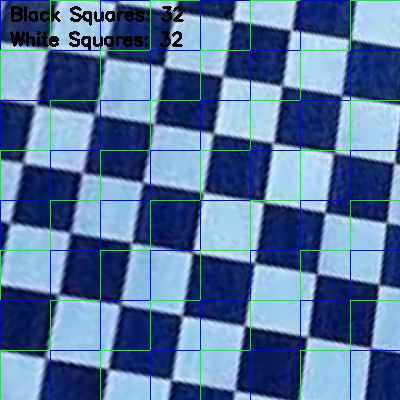

In [5]:
        annotated = warped.copy()
        cell_h, cell_w = 50, 50
        black = white = 0

        for i in range(8):
            for j in range(8):
                y1, y2 = i * cell_h, (i + 1) * cell_h
                x1, x2 = j * cell_w, (j + 1) * cell_w

                # Use chessboard pattern logic to determine color
                if (i + j) % 2 == 0:
                    black += 1
                    color = (0, 0, 255)  # Red for black squares
                else:
                    white += 1
                    color = (0, 255, 0)  # Green for white squares

                # Draw rectangle
                cv2.rectangle(annotated, (x1, y1), (x2, y2), color, 1)

        # Add count annotations
        cv2.putText(annotated, f"Black Squares: {black}", (10, 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 2)
        cv2.putText(annotated, f"White Squares: {white}", (10, 45),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 2)


# **Final Output**

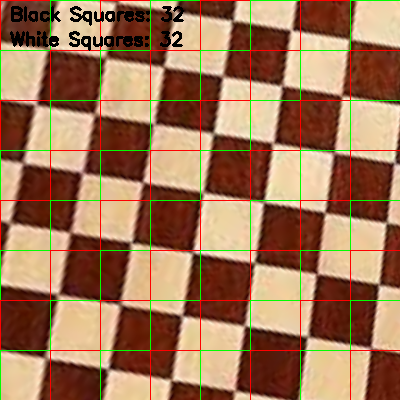

✅ Chessboard Pattern Detected - Black: 32, White: 32


In [6]:
        # Show the final annotated image
        cv2_imshow(annotated)

        # Final print statement
        print(f"✅ Chessboard Pattern Detected - Black: {black}, White: {white}")


**TOP CHESSBOX**

Saving chess.jpg to chess.jpg


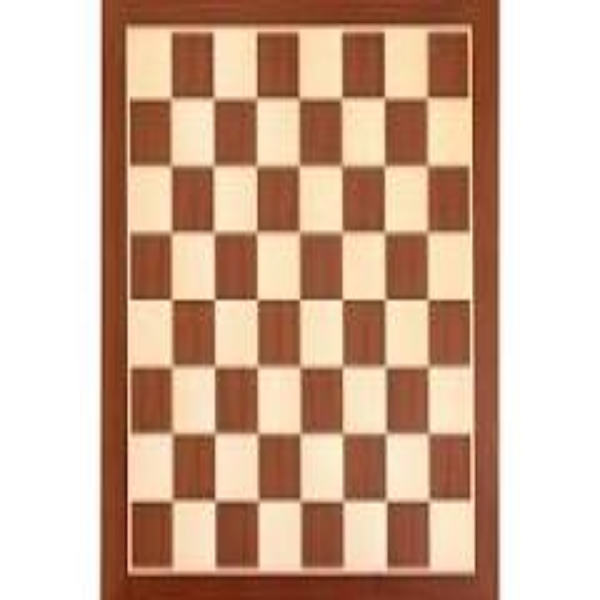

In [8]:
from google.colab import files
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Upload image using Colab's file upload widget
uploaded = files.upload()

# Grab the uploaded filename
image_path = next(iter(uploaded))

# Load and show image
img = cv2.imread(image_path)
if img is not None:
    img_resized = cv2.resize(img, (600, 600))  # Resize for better display
    cv2_imshow(img_resized)
else:
    print("❌ Image could not be loaded. Please check the file format or name.")


In [11]:
# Read the image
img = cv2.imread(image_path)

# Check if the image was loaded correctly
if img is None:
    print(" Image not loaded.")


In [12]:
if img is not None:
    # Resize to standard size
    img_resized = cv2.resize(img, (800, 800))

    # Convert to grayscale for corner detection
    gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

    # Try to find a 7x7 inner corner chessboard pattern
    found, corners = cv2.findChessboardCorners(gray, (7, 7))

    if not found:
        print("⚠️ Chessboard detection failed.")
    else:
        # Improve the accuracy of the corner points
        corners = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1),
                                   (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1))

        # Estimate the outer corners manually based on margin
        margin = 40
        top_left = corners[0][0] - [margin, margin]
        top_right = corners[6][0] + [margin, -margin]
        bottom_right = corners[-1][0] + [margin, margin]
        bottom_left = corners[-7][0] - [margin, -margin]

        # Define source and destination points for transform
        src_pts = np.float32([top_left, top_right, bottom_right, bottom_left])
        dst_pts = np.float32([[0, 0], [400, 0], [400, 400], [0, 400]])

        # Apply perspective warp to get top-down view
        matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
        warped = cv2.warpPerspective(img_resized, matrix, (400, 400))


array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0, 255],
        [209, 237, 250],
        [209, 237, 250],
        ...,
        [ 46,  72, 151],
        [ 45,  71, 151],
        [ 44,  71, 151]],

       [[  0,   0, 255],
        [209, 237, 250],
        [209, 238, 250],
        ...,
        [ 45,  72, 151],
        [ 44,  71, 151],
        [ 44,  71, 151]],

       ...,

       [[  0, 255,   0],
        [ 54,  79, 149],
        [ 54,  80, 148],
        ...,
        [201, 233, 243],
        [202, 234, 244],
        [203, 235, 245]],

       [[  0, 255,   0],
        [ 55,  80, 149],
        [ 54,  80, 148],
        ...,
        [203, 235, 245],
        [203, 235, 245],
        [203, 235, 245]],

       [[  0, 255,   0],
        [ 56,  81, 150],
        [ 55,  81, 148],
        ...,
        [205, 236, 246],
        [204, 236, 246],
        [204, 235, 246]]], dtype=uint8)
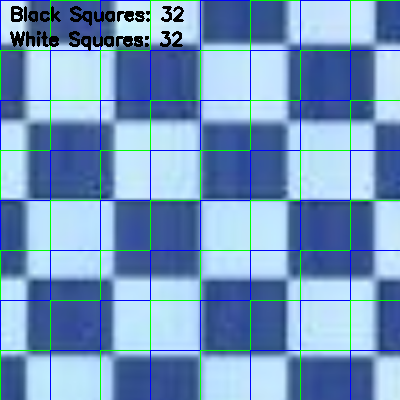

In [13]:
        annotated = warped.copy()
        cell_h, cell_w = 50, 50
        black = white = 0

        for i in range(8):
            for j in range(8):
                y1, y2 = i * cell_h, (i + 1) * cell_h
                x1, x2 = j * cell_w, (j + 1) * cell_w

                # Use chessboard pattern logic to determine color
                if (i + j) % 2 == 0:
                    black += 1
                    color = (0, 0, 255)  # Red for black squares
                else:
                    white += 1
                    color = (0, 255, 0)  # Green for white squares

                # Draw rectangle
                cv2.rectangle(annotated, (x1, y1), (x2, y2), color, 1)

        # Add count annotations
        cv2.putText(annotated, f"Black Squares: {black}", (10, 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 2)
        cv2.putText(annotated, f"White Squares: {white}", (10, 45),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 2)


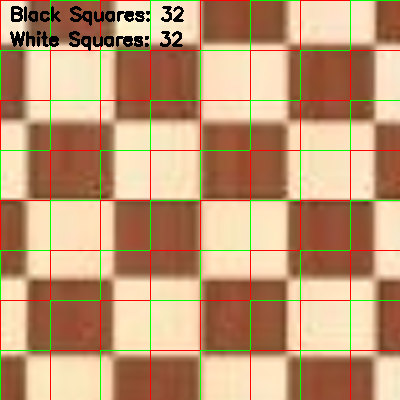

✅ Chessboard Pattern Detected - Black: 32, White: 32


In [14]:
        # Show the final annotated image
        cv2_imshow(annotated)

        # Final print statement
        print(f"✅ Chessboard Pattern Detected - Black: {black}, White: {white}")
